In [1]:
# Read in the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spotify = pd.read_csv('spotify.csv')

/var/folders/kl/jtbbpqbs317ds_rc806vd7h40000gn/T/ipykernel_62240/681569860.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
'''using the average we can make model like linear regression, decision tree, or forest

cleared_data = pd.read_csv('spotify.csv').drop(columns=['track_id', 'key']).dropna(how='any')

cleared_data['popularity'] = cleared_data['popularity'].apply(lambda x: 'popular' if x > 75 else 'not_popular')

# Convert True to 1 and False to 0 in the "popularity" column
cleared_data['explicit'] = cleared_data['explicit'].astype(int)

# Remove duplicates based on track name
cleared_data = cleared_data.drop_duplicates(subset=['track_name'])

# Convert milliseconds to seconds
cleared_data['duration_s'] = cleared_data['duration_ms'] / 1000

# List of columns you want to keep
columns_to_keep = ['popularity','duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

columns_to_get_mean = ['duration_s', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Filtering columns
cleared_data = cleared_data[columns_to_keep]

# Reshape the data to long format
long_data = pd.melt(cleared_data, id_vars=['popularity'], var_name='feature', value_name='value')

# Calculate the mean for each feature and diagnosis
means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()

# Reshape the data back to wide format
wide_means = means.pivot(index='feature', columns='popularity', values='value')

# Print the result
print(wide_means)

# create a blx plot
# Create a box plot
sns.set(style="whitegrid")
g = sns.FacetGrid(long_data, col='feature', col_wrap=2, margin_titles=True,
                  xlim=(long_data['value'].min(), long_data['value'].max()))
g.map(sns.boxplot, 'value', 'popularity', 'popularity', order=['popular', 'not_popular'],
      hue_order=['popular', 'not_popular'], palette={"popular": "tomato", "not_popular": "cyan"})
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()  # Remove the legend
plt.show()
'''

'using the average we can make model like linear regression, decision tree, or forest\n\ncleared_data = pd.read_csv(\'spotify.csv\').drop(columns=[\'track_id\', \'key\']).dropna(how=\'any\')\n\ncleared_data[\'popularity\'] = cleared_data[\'popularity\'].apply(lambda x: \'popular\' if x > 75 else \'not_popular\')\n\n# Convert True to 1 and False to 0 in the "popularity" column\ncleared_data[\'explicit\'] = cleared_data[\'explicit\'].astype(int)\n\n# Remove duplicates based on track name\ncleared_data = cleared_data.drop_duplicates(subset=[\'track_name\'])\n\n# Convert milliseconds to seconds\ncleared_data[\'duration_s\'] = cleared_data[\'duration_ms\'] / 1000\n\n# List of columns you want to keep\ncolumns_to_keep = [\'popularity\',\'duration_s\', \'explicit\', \'danceability\', \'energy\', \'loudness\', \'speechiness\',\n                   \'acousticness\', \'instrumentalness\', \'liveness\', \'valence\', \'tempo\']\n\ncolumns_to_get_mean = [\'duration_s\', \'explicit\', \'danceability\

In [3]:
spotify.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [4]:
"""
Looking at the table above.
Popularity, duration, key, loudness, tempo and time_signature have occurences that go beyond the range of 0-1.
25% of values in instrumentalness are less than or equal to 0 so we can impute. They are predominantly instrumental
75% of values in mode are equal to 1, mode may be dropped from the feature selection process as it conveys litle information about individual tracks
"""

'\nLooking at the table above.\nPopularity, duration, key, loudness, tempo and time_signature have occurences that go beyond the range of 0-1.\n25% of values in instrumentalness are less than or equal to 0 so we can impute. They are predominantly instrumental\n75% of values in mode are equal to 1, mode may be dropped from the feature selection process as it conveys litle information about individual tracks\n'

In [5]:
track_count = len(spotify.track_name.unique())
track_count

73602

In [6]:
# find duplicates
duplicate_rows = spotify[spotify.duplicated(['track_name'])]
len(duplicate_rows)

40398

In [7]:
# drop duplicates
spotify = spotify.drop_duplicates(subset=['track_name'])
spotify

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.1710,1,-15.668,1,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3,world-music
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


#### Genre Analysis 

In [8]:
genres = spotify.track_genre.unique()
len(genres)

113

/var/folders/kl/jtbbpqbs317ds_rc806vd7h40000gn/T/ipykernel_62240/163583580.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_popularity, x='track_genre', y='popularity', order=sorted_genres, palette='rainbow')


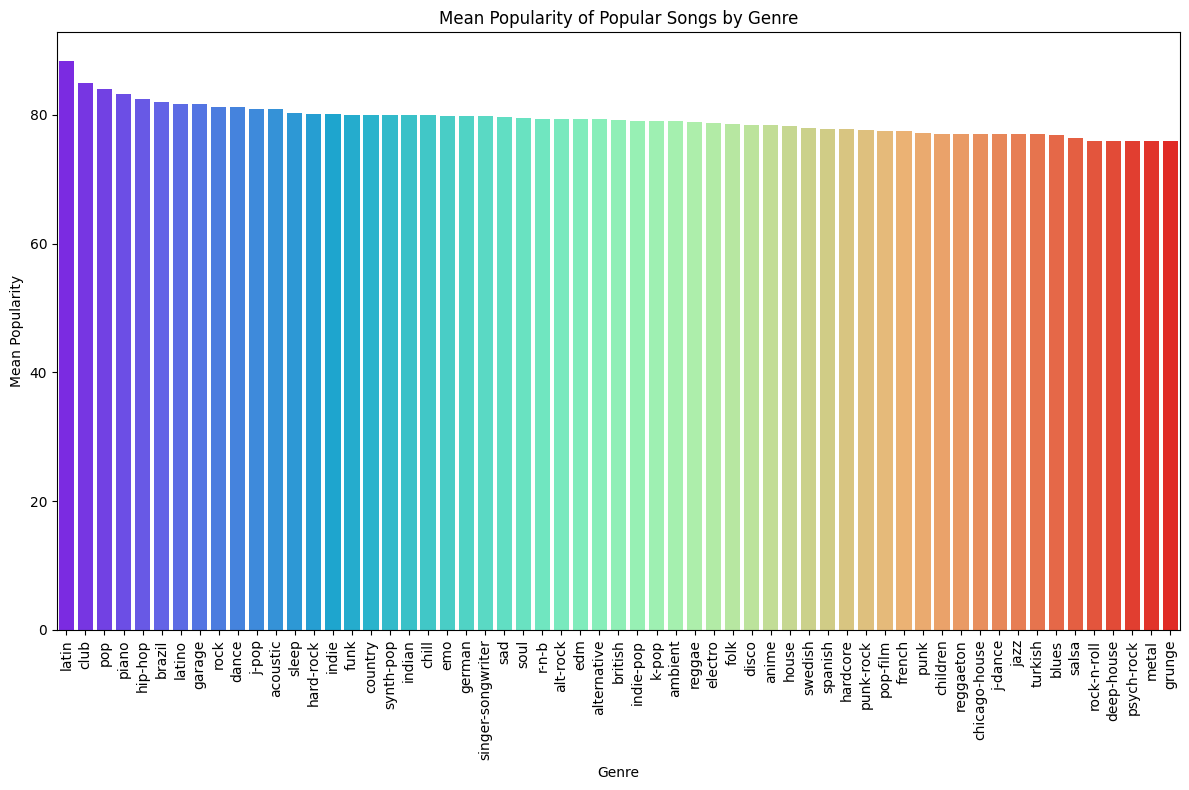

In [9]:
# Filter popular songs
popular_songs = spotify[spotify['popularity'] > 75]

# Group by genre and calculate mean popularity
genre_popularity = popular_songs.groupby('track_genre')['popularity'].mean().reset_index()

# Sort genres by popularity
sorted_genres = genre_popularity.sort_values(by='popularity', ascending=False)['track_genre']

plt.figure(figsize=(12, 8))
sns.barplot(data=genre_popularity, x='track_genre', y='popularity', order=sorted_genres, palette='rainbow')

plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity of Popular Songs by Genre')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [10]:
# Filter popular songs with the genre
club_genre_songs = popular_songs[popular_songs['track_genre'] == 'house']

# Calculate the mean popularity for the genre
mean_popularity_club_genre = club_genre_songs['popularity'].mean()

print("Mean popularity for the genre:", mean_popularity_club_genre)

Mean popularity for the genre: 78.3


In [11]:
"""
Look into more songs in the genres with the highest count to discover popular and trending tracks.
Black metal, comedy and Afrobeats have the highest frequencies.

"""
# for exact numbers
genre_count = spotify['track_genre'].value_counts()
genre_count

track_genre
black-metal    981
comedy         965
afrobeat       945
heavy-metal    944
cantopop       935
              ... 
reggae         142
rock           116
house           98
indie           93
reggaeton       56
Name: count, Length: 113, dtype: int64

#### Genre Vs Dancebility (or any other feature) with popular songs being > 75

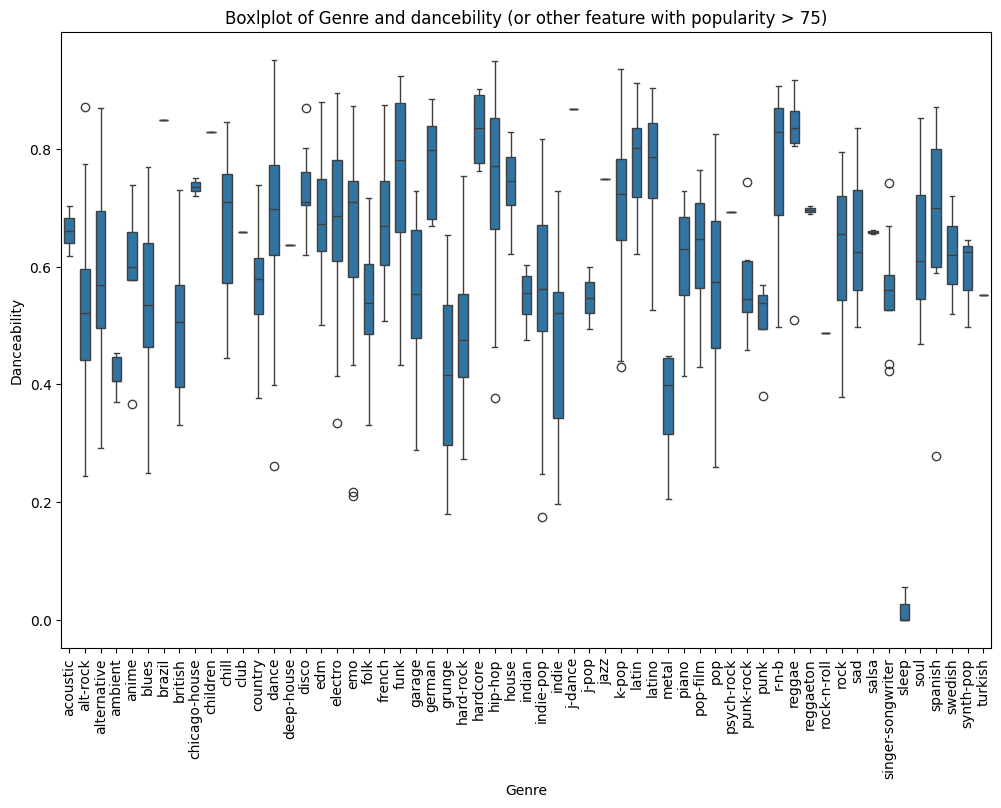

In [12]:

plt.figure(figsize=(12, 8))
    
sns.boxplot(data=popular_songs, x='track_genre', y='danceability', width=0.6)
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.title('Boxlplot of Genre and dancebility (or other feature with popularity > 75)')
plt.xticks(rotation=90)
plt.show()


In [13]:
"""
interpret boxplot:
genres with low dancibility 
gerres with high dancibility 
can do with other features too

maybe drop irrelevent genres
"""

'\ninterpret boxplot:\ngenres with low dancibility \ngerres with high dancibility \ncan do with other features too\n\nmaybe drop irrelevent genres\n'

#### Audio

In [14]:
# instrumentalness
count = spotify['instrumentalness'].value_counts()[0]
count

23775

In [15]:
# replce 0 with means
spotify['instrumentalness'] = spotify['instrumentalness'].replace(0, spotify['instrumentalness'].mean())
print(spotify['instrumentalness'])

0         0.000001
1         0.000006
2         0.184390
3         0.000071
4         0.184390
            ...   
113994    0.022900
113995    0.928000
113996    0.976000
113997    0.184390
113999    0.184390
Name: instrumentalness, Length: 73602, dtype: float64


In [16]:
# convert explicit to boolean -  where 0 is False and 1 is True
spotify['explicit'] = spotify['explicit'].astype(int)
spotify['explicit']
#explicit_tracks = spotify[spotify['explicit'] == 1]
#print(explicit_tracks.head(1)) 

0         0
1         0
2         0
3         0
4         0
         ..
113994    0
113995    0
113996    0
113997    0
113999    0
Name: explicit, Length: 73602, dtype: int64

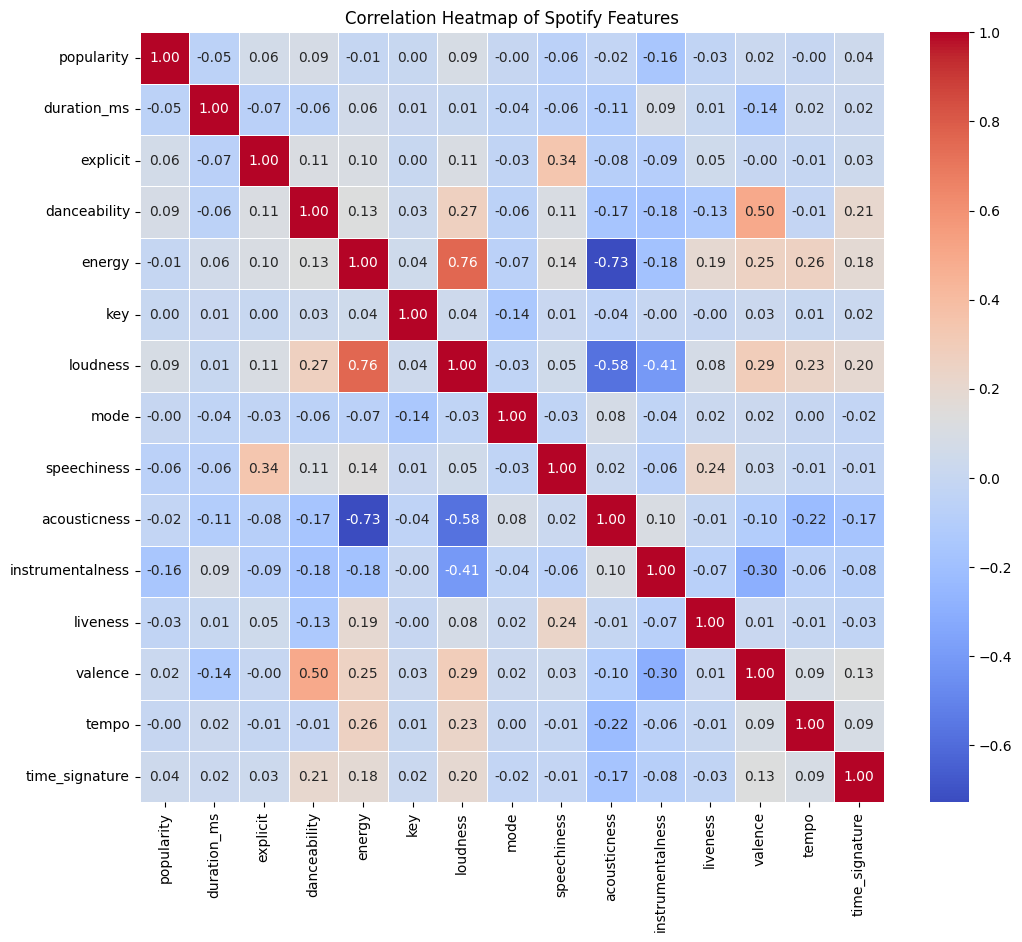

In [17]:
# Corrlation heat map
# Drop unnecessary columns
columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
spotify_df = spotify.drop(columns=columns_to_drop)

# Calculate correlation matrix
correlation_matrix = spotify_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Spotify Features')
plt.show()

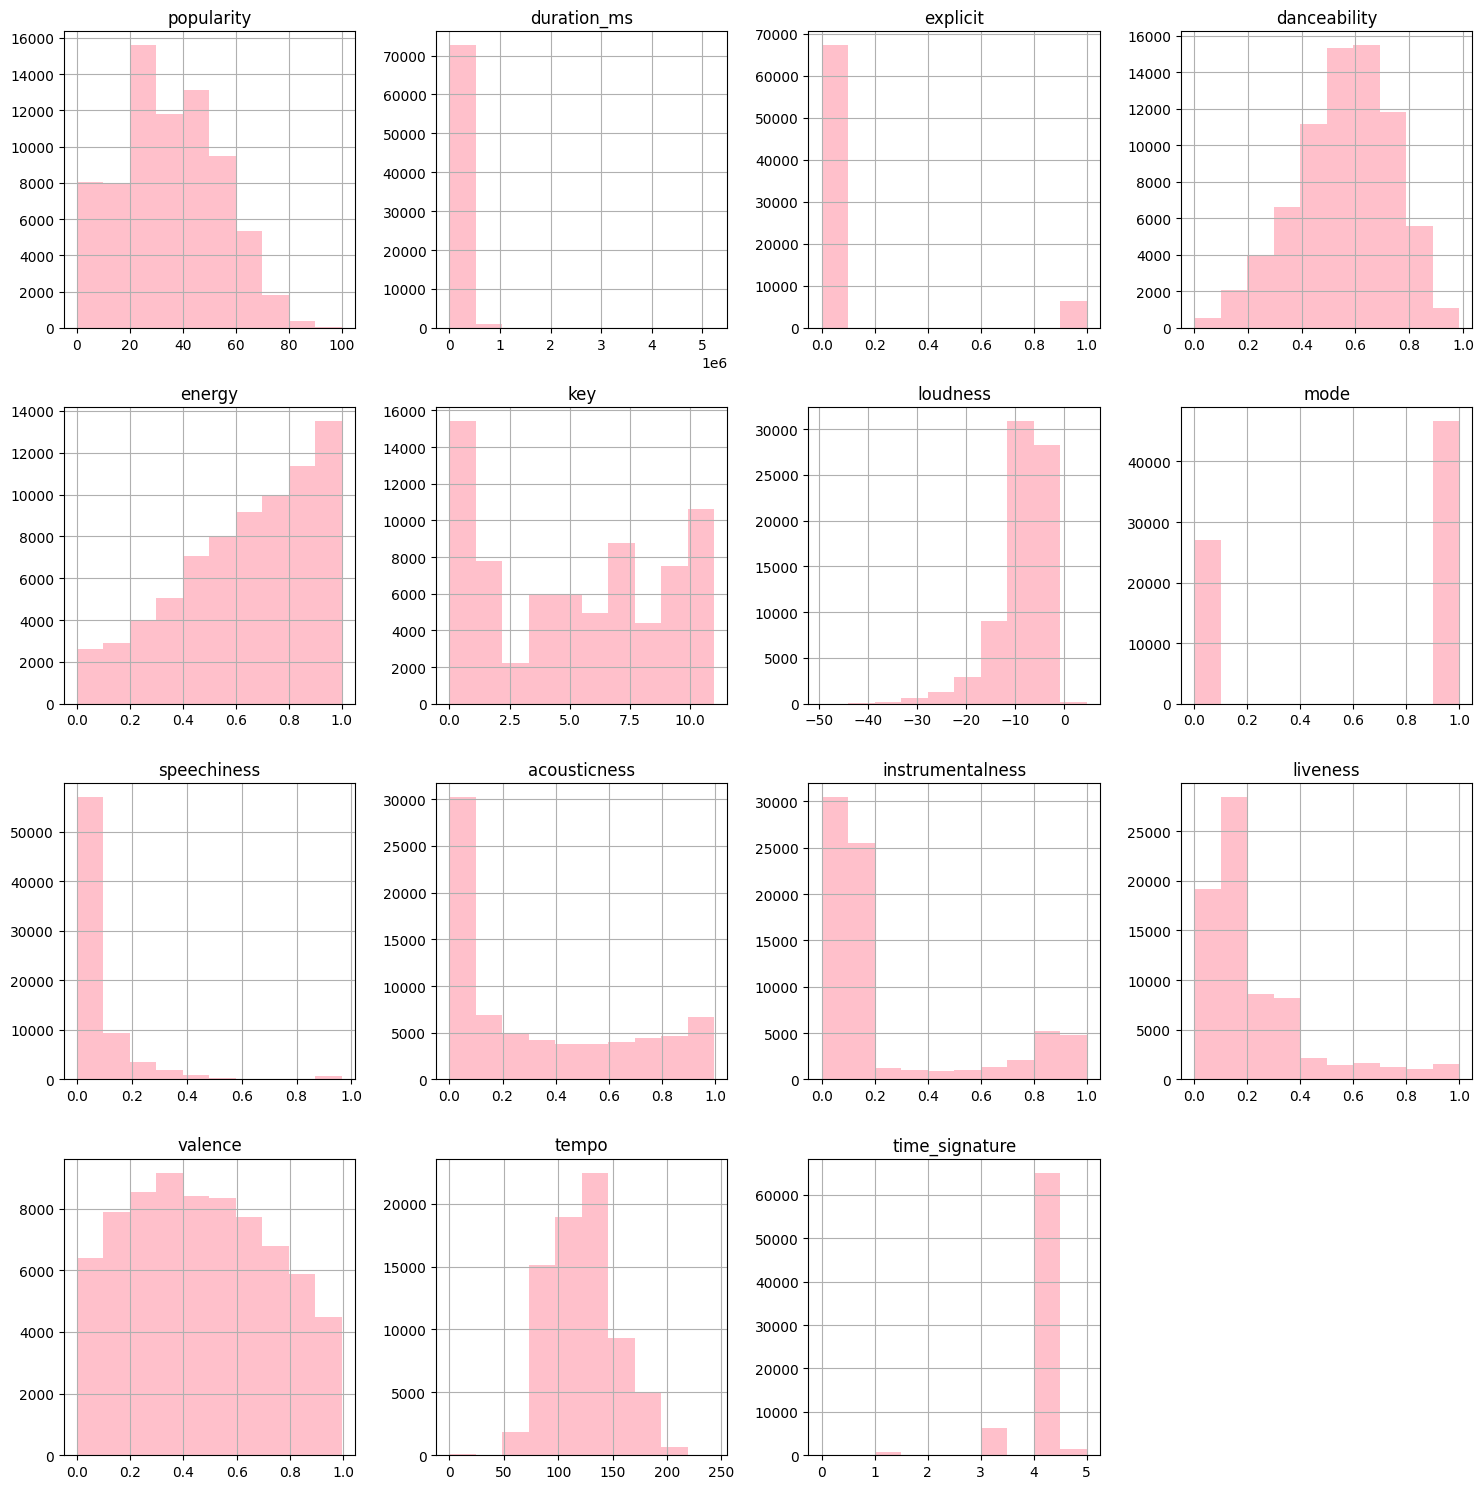

In [18]:
# histograms to analyze each audio feature
spotify.hist(figsize=(15, 15), color = 'pink')
plt.tight_layout()
plt.show()

The 'duration' distribution is also not uniform across the data and can be dropped.

The 'explicit' distribution is again discrete, and since most of the songs are non-explicit, we can drop this feature.

Most of the distributions are skewed and hence a suitable scaling technique is required for processing the dataset.

In [19]:
spotify = spotify.drop(['track_id', 'album_name', 'duration_ms' ,], axis =1)

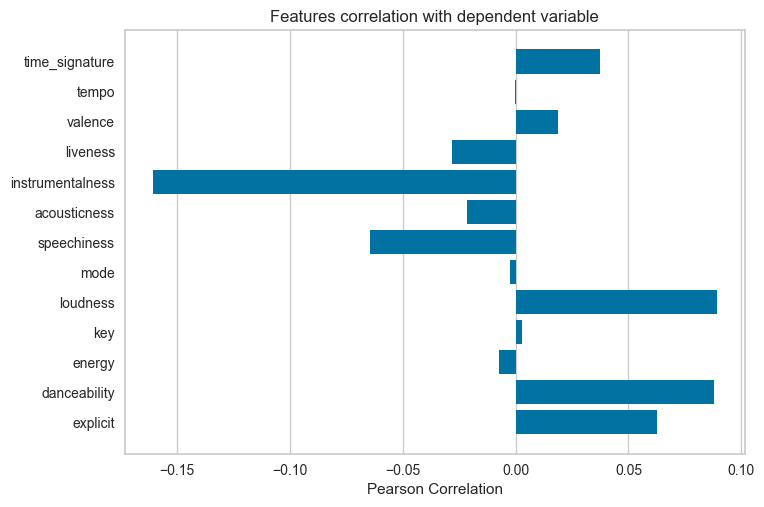

<Figure size 800x550 with 0 Axes>

In [20]:
# individual correlation with popularity
import numpy as np
from yellowbrick.target.feature_correlation import feature_correlation

# Drop non-numeric or irrelevant columns
X = spotify.drop(['track_name', 'track_genre', 'artists', 'popularity'], axis=1)
y = spotify['popularity']

feature_names = X.columns.tolist()

visualizer = feature_correlation(X.values, y.values, labels=feature_names)
plt.tight_layout()
plt.show()

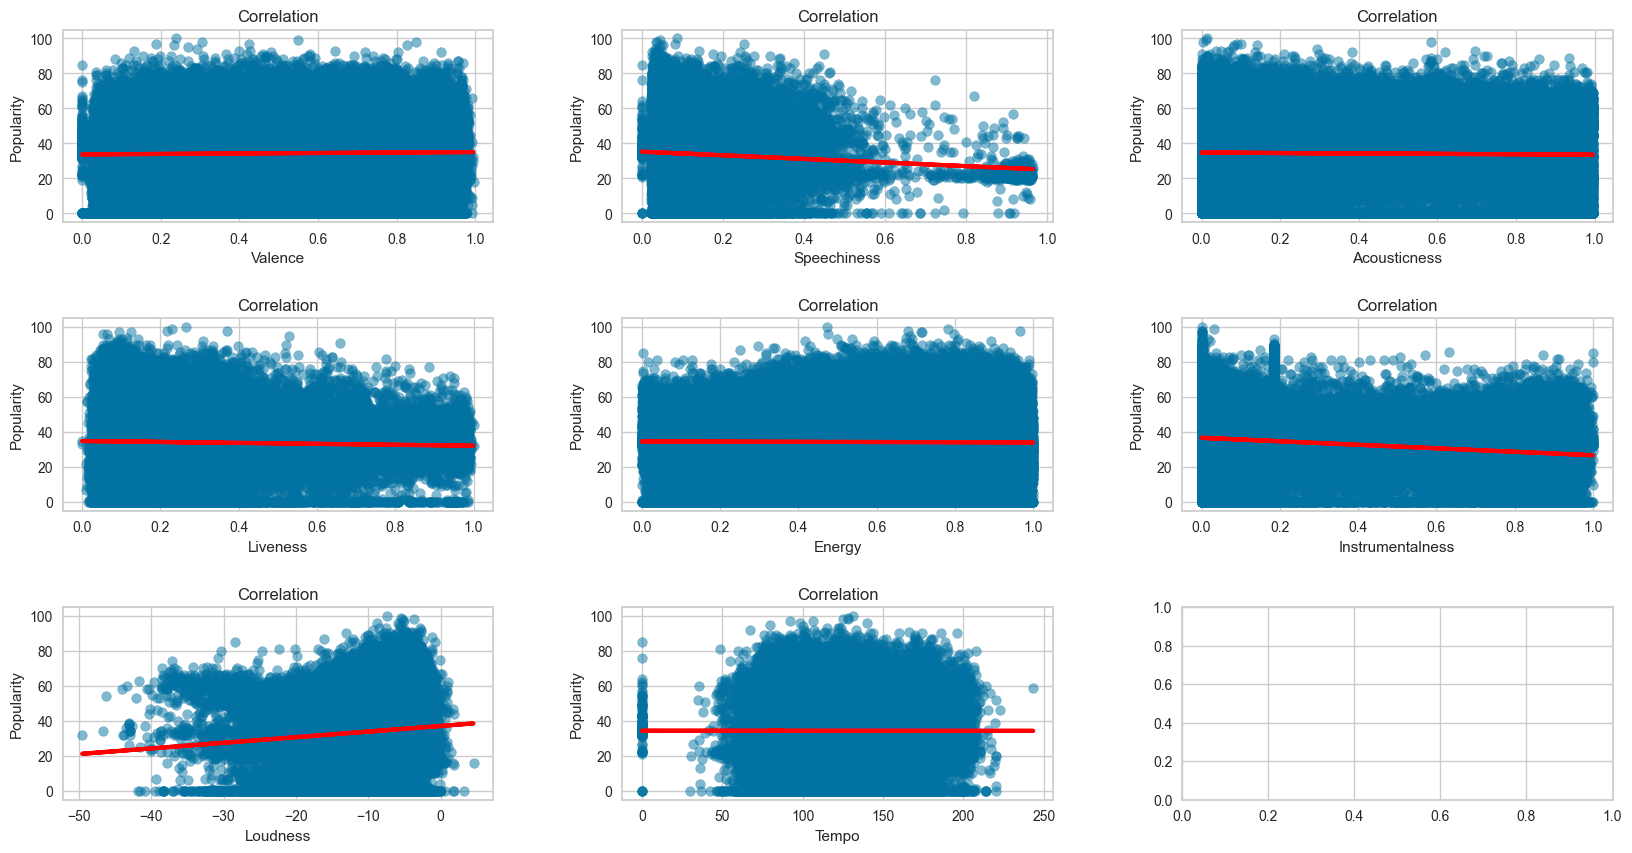

In [21]:
# scatter plot
from sklearn.linear_model import LinearRegression

def plot_feature(ax, feature_name, X, y, x_label):
    regr = LinearRegression()
    regr.fit(X, y)

    ax.scatter(X, y, alpha=0.5, label=f'{feature_name} vs. Popularity')
    ax.plot(X, regr.predict(X), color="red", linewidth=3)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Popularity")
    ax.set_title("Correlation")

# Create a single figure for all the subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.5)

# List of features and their corresponding column names
features = ["Valence", "Speechiness", "Acousticness", "Liveness", "Energy", "Instrumentalness", "Loudness", "Tempo"]
columns = ["valence", "speechiness", "acousticness", "liveness", "energy", "instrumentalness", "loudness", "tempo"]

for i, feature_name in enumerate(features):
    row, col = divmod(i, 3)
    plot_feature(
        axes[row, col],
        feature_name,
        spotify[[columns[i]]].values,
        spotify["popularity"].values,
        feature_name
    )
plt.show()

In [22]:
# Robost Scaling - 
# Robust scaling produces a much wider range of values than the standard scaler. 
# Outliers cause the mean and standard deviation to soar to much higher values. 

from sklearn.preprocessing import RobustScaler
# Select the columns to be scaled (exclude 'track_genre')
numeric_columns = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit', 'mode']

# Create a RobustScaler instance
scaler = RobustScaler()

# Apply Robust scaling to the selected columns
spotify[numeric_columns] = scaler.fit_transform(spotify[numeric_columns])

In [23]:
spotify

,artists,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,1.444444,0.0,0.420408,-0.544776,-0.666667,0.097639,-1.0,1.789675,-0.263089,-1.003456,1.183307,0.594966,-0.832826,0.0,acoustic
1,Ben Woodward,Ghost - Acoustic,0.777778,0.0,-0.624490,-1.278607,-0.666667,-1.871849,0.0,0.514340,1.186992,-1.003431,-0.174326,-0.430206,-1.087349,0.0,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,0.851852,0.0,-0.551020,-0.798507,-0.833333,-0.463409,0.0,0.120459,0.026016,0.000000,-0.089805,-0.766590,-1.115589,0.0,acoustic
3,Kina Grannis,Can't Help Falling In Love,1.370370,0.0,-1.253061,-1.543284,-0.833333,-2.112191,0.0,-0.250478,1.156098,-1.003076,-0.010565,-0.713959,1.457174,-1.0,acoustic
4,Chord Overstreet,Hold On,1.777778,0.0,0.183673,-0.589552,-0.500000,-0.453457,0.0,0.061185,0.447154,0.000000,-0.269942,-0.659039,-0.051000,0.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,Lucas Cervetti,"Frecuencia Álmica, Pt. 4",-0.444444,0.0,-0.987755,-1.266169,-0.666667,-1.577618,0.0,-0.275335,1.180488,-0.878838,-0.349181,-0.292906,0.246725,-1.0,world-music
113995,Rainy Lullaby,Sleep My Little Boy,-0.481481,0.0,-1.636735,-1.106965,0.000000,-1.713749,0.0,-0.137667,0.725203,4.046756,-0.251981,-0.963616,0.096569,1.0,world-music
113996,Rainy Lullaby,Water Into Light,-0.444444,0.0,-1.628571,-1.400498,-0.833333,-2.075201,-1.0,-0.177820,1.300813,4.307974,-0.153196,-0.961098,-0.898190,0.0,world-music
113997,Cesária Evora,Miss Perfumado,-0.444444,0.0,0.228571,-0.873134,-0.833333,-0.681406,-1.0,-0.141491,1.094309,0.000000,-0.264659,0.659039,0.252363,0.0,world-music


In [25]:
# Clustering by Genre
# Calculate the mean danceability and mean valence for each genre
genre_stats = spotify.groupby('track_genre').agg({'popularity': 'mean'}).reset_index()

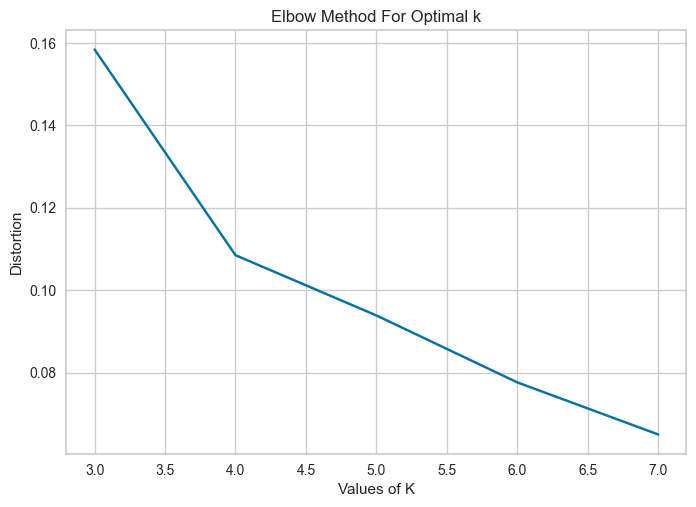

In [26]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

range_n_clusters = [3, 4, 5, 6, 7]
distortions = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(genre_stats[['popularity']])
    cluster_labels = kmeans.labels_
    
    # calculate distortion
    distortions.append(sum(np.min(cdist(genre_stats[['popularity']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / genre_stats.shape[0])

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow Method For Optimal k')
plt.show()

## cluster For danceabilty and valence

In [25]:
genre_stats = spotify.groupby('track_genre').agg({'danceability': 'mean', 'valence': 'mean'}).reset_index()

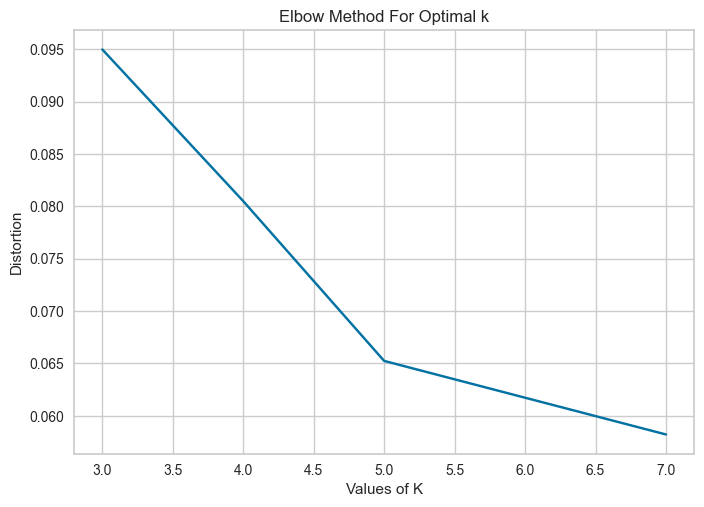

In [26]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
range_n_clusters = [3, 4, 5, 6, 7]
distortions = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(genre_stats[['danceability', 'valence']])
    cluster_labels = kmeans.labels_
    
    # calculate distortion
    distortions.append(sum(np.min(cdist(genre_stats[['danceability', 'valence']], kmeans.cluster_centers_, 'euclidean'), axis=1)) / genre_stats.shape[0])

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow Method For Optimal k')
plt.show()

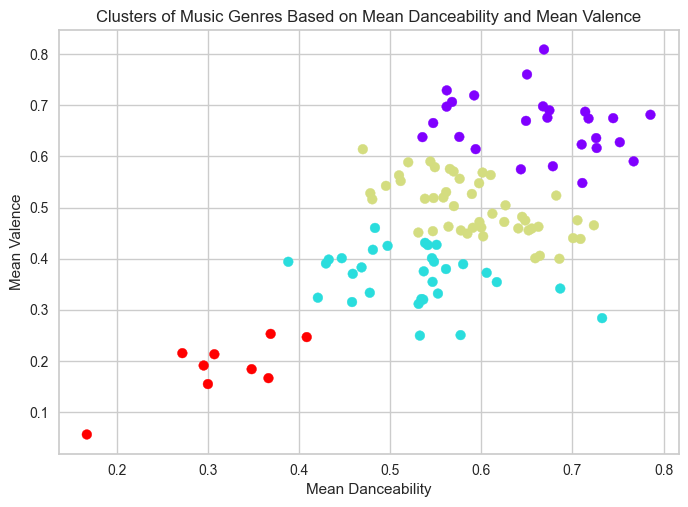

     track_genre  danceability   valence  cluster
0       acoustic      0.550901  0.427111        1
1       afrobeat      0.667756  0.697985        0
2       alt-rock      0.538167  0.517235        2
3    alternative      0.612156  0.488057        2
4        ambient      0.366433  0.166304        3
..           ...           ...       ...      ...
108       techno      0.686650  0.341574        1
109       trance      0.577280  0.250521        1
110     trip-hop      0.644835  0.481849        2
111      turkish      0.625206  0.471832        2
112  world-music      0.408421  0.246614        3

[113 rows x 4 columns]


In [27]:
# Number of clusters (you can adjust this based on your preference)
num_clusters = 5

# Perform K-Means clustering based on mean danceability and mean valence
kmeans = KMeans(n_clusters=num_clusters, random_state=10)
genre_stats['cluster'] = kmeans.fit_predict(genre_stats[['danceability', 'valence']])
custom_cluster_labels = list(range(num_clusters))

# Plot the clusters
plt.scatter(genre_stats['danceability'], genre_stats['valence'], c=genre_stats['cluster'], cmap='rainbow')
plt.xlabel('Mean Danceability')
plt.ylabel('Mean Valence')
plt.title('Clusters of Music Genres Based on Mean Danceability and Mean Valence')
plt.show()

# Display the cluster assignments
print(genre_stats[['track_genre', 'danceability', 'valence', 'cluster']])